In [32]:
#### test for convergence for the whole AML network from literature w/ bool rules in Julia 
#does not use patient data for now 

In [33]:
#loading the packages#

#using Pkg
#Pkg.add("DataFrames")
#Pkg.add("Random")
#Pkg.add("RollingFunctions")
#Pkg.add("XLSX")
#Pkg.add("Distributions") 
#Pkg.add("Plots")

using DataFrames
using Random
using RollingFunctions
import XLSX
using Distributions
using Plots

In [34]:
# setting the variables and constants #

n_obs = 150000  # number of steps
p = 81  # number of variables
chance_to_flip = 0.75

#creates an "empty" time series
empty_series = falses(p, n_obs)

# Initial value of the variables were randomly chosen to be false (0) or true (1)
empty_series[:, 1] .= rand(Bool, p)

# Save the empty series as a time series
time_series = empty_series

# Saving a network_score matrix to save the scores later
network_scores = zeros(n_obs, 5)

150000×5 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 ⋮                   
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [35]:
    for col in 2:n_obs
        # Simulate each time step based on the previous time step and Boolean functions
        time_series[1,col] = time_series[1, col - 1]  # KITLG = KITLG
        time_series[2,col] = time_series[2, col - 1]  # FLT3LG = FLT3LG
        time_series[3,col] = time_series[6,col-1] & time_series[11,col-1] & time_series[10,col-1]	#GRB2 = BCR_ABL | FLT3 | KIT
        time_series[4,col] = time_series[4, col - 1]  # KDM5A = KDM5A
        time_series[5,col] = !time_series[4,col-1] & time_series[5,col-1] #PTEN = !KDM5A & PTEN
        time_series[6,col] = !time_series[5,col-1] #BCR_ABL = !PTEN
        time_series[7,col] = time_series[7, col - 1]  # CBLB = CBLB
        time_series[8,col] = time_series[3,col-1] #CBL = GRB2
        time_series[9,col] = time_series[3,col-1] #SOS1 = GRB2
        time_series[10,col] = !(time_series[8,col-1] | time_series[7,col-1]) & (time_series[16,col-1] | time_series[1,col-1]) #KIT = !(CBL | CBLB) & (AML1_ETO | KITLG)
        time_series[11,col] = !(time_series[8,col-1] | time_series[7,col-1]) & time_series[2,col-1] #FLT3 = !(CBL | CBLB ) & FLT3LG
        time_series[12,col] = time_series[12, col - 1]  # CDK1 = CDK1
        time_series[13,col] = time_series[13, col - 1]  # STAG2 = STAG2
        time_series[14,col] = time_series[14, col - 1]  # SH2B3 = SH2B3
        time_series[15,col] = !time_series[11,col-1] #PTPN6 =!FLT3
        time_series[16,col] = time_series[16, col - 1]  # AML1_ETO = AML1_ETO
        time_series[17,col] = time_series[17, col - 1]  # PML_RARalpha = PML_RARalpha
        time_series[18,col] = time_series[11,col-1] & time_series[10,col-1] #PTPN11 = FLT3 | KIT
        time_series[19,col] = !time_series[12,col-1] #CUX1 =!CDK1
        time_series[20,col] = time_series[13,col-1] #RAD21 = STAG2
        time_series[21,col] = !time_series[14,col-1] & time_series[29,col-1] #BCL2L1 = !SH2B3 & STAT5A
        time_series[22,col] = !(time_series[16,col-1] | time_series[15,col-1] | time_series[14,col-1]) & (time_series[6,col-1] | time_series[10,col-1]) #JAK2 = !(AML1_ETO | PTPN6 | SH2B3) & (BCR_ABL | KIT)
        time_series[23,col] = time_series[17,col-1] #CCNA1 = PML_RARalpha
        time_series[24,col] = !(time_series[16,col-1] | time_series[11,col-1]) | (time_series[17,col-1]) #CEBPA =!(AML1_ETO | FLT3 | PML_RARalpha)
        time_series[25,col] = !time_series[19,col-1] #PIK3IP1 =!CUX1
        time_series[26,col] = time_series[9,col-1] & time_series[18,col-1] #NRAS = SOS1 | PTPN11
        time_series[27,col] = !time_series[20,col-1] & time_series[17,col-1] #GATA2 = !RAD21 & PML_RARalpha
        time_series[28,col] = !time_series[21,col-1] #BAX = !BCL2L1
        time_series[29,col] = time_series[22,col-1] & time_series[6,col-1] #STAT5A = JAK2 | BCR_ABL 
        time_series[30,col] = !time_series[24,col-1] #SOX4 = !CEBPA
        time_series[31,col] = !(time_series[25,col-1]) & (time_series[11,col-1] | time_series[10,col-1] | time_series[26,col-1] | time_series[32,col-1]) #PI3K = !PIK3IP1 & (FLT3 | KIT | NRAS | SPI1)
        time_series[32,col] = !time_series[27,col-1] & time_series[24,col-1] #SPI1 = !GATA2 & CEBPA
        time_series[33,col] = time_series[29,col-1] #PIM = STAT5A
        time_series[34,col] = time_series[30,col-1] & time_series[11,col-1] #CTNNB1 =  SOX4 | FLT3 
        time_series[35,col] = time_series[31,col-1] #AKT = PI3K 
        time_series[36,col] = !time_series[32,col-1] & time_series[27,col-1] #GATA1 = !SPI1 & GATA2
        time_series[37,col] = time_series[37,col - 1] #NUP98_Fusion = NUP98_Fusion
        time_series[38,col] = time_series[38,col - 1] #MLL_Fusion = MLL_Fusion
        time_series[39,col] = !time_series[35,col-1] #FOXO = !AKT
        time_series[40,col] = time_series[35,col-1] #EP300 = AKT
        time_series[41,col] = !time_series[35,col-1] & time_series[26,col-1] #BRAF = !AKT & NRAS
        time_series[42,col] = time_series[36,col-1] #CBFB = GATA1
        time_series[43,col] = time_series[37,col-1] #CDK6 = NUP98_Fusion
        time_series[44,col] = time_series[38,col-1] #MECOM = MLL_Fusion
        time_series[45,col] = time_series[38,col-1] #CBFbeta_MYH11 = MLL_Fusion
        time_series[46,col] = time_series[46,col - 1] #NPM1 = NPM1
        time_series[47,col] = time_series[39,col-1] #IDH1 = FOXO
        time_series[48,col] = time_series[48,col - 1] #IDH2 = IDH2
        time_series[49,col] = time_series[41,col-1] #ERK1/2 = BRAF 
        time_series[50,col] = !(time_series[38,col-1] | time_series[45,col-1] | time_series[20,col-1]) & (time_series[11,col-1] | time_series[43,col-1] | time_series[42,col-1] | time_series[50,col-1])	#RUNX1 = !(MLL_Fusion | CBFbeta_MYH11 | RAD21) & (FLT3 | CDK6 | CBFB | RUNX1)
        time_series[51,col] = time_series[45,col-1] #DOT1L = CBFbeta_MYH11
        time_series[52,col] = time_series[46,col-1] #FBXW7 = NPM1
        time_series[53,col] = time_series[53,col - 1]	#AMPK = AMPK
        time_series[54,col] = time_series[54,col - 1] #ASXL2 = ASXL2
        time_series[55,col] = time_series[47,col-1] & time_series[48,col-1] #OXO2 = IDH1 | IDH2
        time_series[56,col] = !time_series[49,col-1] #ETV6 = !ERK1/2
        time_series[57,col] = time_series[49,col-1] #AP1 = ERK1/2 
        time_series[58,col] = time_series[58,col - 1]	#DNMT3A = DNMT3A
        time_series[59,col] = !time_series[35,col-1] #AEZH2 = !AKT
        time_series[60,col] = time_series[60,col - 1]	#ASXL1 = ASXL1
        time_series[61,col] = !(time_series[52,col-1] | time_series[50,col-1]) & (time_series[49,col-1] | time_series[51,col-1]) #MYC = !(FBXW7 | RUNX1) & (ERK1/2 | DOT1L)
        time_series[62,col] = !time_series[53,col-1] & !time_series[35,col-1] #MTOR = !(AMPK | AKT)
        time_series[63,col] = time_series[55,col-1] | time_series[53,col-1] | time_series[54,col-1] #TET2 = OXO2 | AMPK | ASXL2
        time_series[64,col] = time_series[64,col - 1] #PHF6 = PHF6
        time_series[65,col] = !time_series[58,col-1] #CCND1 = !DNMT3A 
        time_series[66,col] = !(time_series[59,col-1] | time_series[58,col-1] | time_series[60,col-1]) & time_series[51,col-1] #HOXA9 = !(AEZH2 | DNMT3A | ASXL1) & DOT1L 
        time_series[67,col] = !(time_series[58,col-1] | time_series[61,col-1] | time_series[16,col-1]) & (time_series[60,col-1] | time_series[46,col-1]) #CDKN2A = !( DNMT3A | MYC | AML1_ETO) & (ASXL1 | NPM1)
        time_series[68,col] = time_series[68,col - 1] #SRSF2 = SRSF2
        time_series[69,col] = time_series[63,col-1] #WT1 = TET2
        time_series[70, col] = time_series[70,col - 1]	#BCOR = BCOR
        time_series[71,col] = !time_series[64,col-1] #UBTF = !PHF6
        time_series[72,col] = !time_series[58,col-1] & (time_series[66,col-1] | time_series[51,col-1]) #MEIS1 =!DNMT3A & (HOXA9 | DOT1L)
        time_series[73,col] = !time_series[67,col-1] & (time_series[68,col-1] | time_series[77,col-1] | time_series[35,col-1]) #MDM2 = !CDKN2A & (SRSF2 | TP53 | AKT)
        time_series[74, col] = time_series[74,col - 1]	#U2AF1 = U2AF1
        time_series[75, col] = time_series[75,col - 1]	#XPO1 = XPO1
        time_series[76, col] = time_series[76,col - 1]	#CREBBP = CREBBP
        time_series[77,col] = !(time_series[73,col-1] | time_series[45,col-1] | time_series[75,col-1]) & (time_series[74,col-1]) & time_series[76,col-1] #TP53 = !(MDM2 | CBFbeta_MYH11 | XPO1 | U2AF1) & (CREBBP)
        time_series[78,col] = !time_series[77,col-1] & (time_series[49,col-1] | time_series[51,col-1]) #BCL2 = !TP53 & (ERK1/2 | DOT1L)   
        time_series[79,col] = !(time_series[67,col-1] | time_series[69,col-1] | time_series[70,col-1]) & (time_series[29,col-1] | time_series[34,col-1] | time_series[61,col-1] | time_series[57,col-1] | time_series[23,col-1] | time_series[72,col-1] | time_series[65,col-1] | time_series[71,col-1] | time_series[39,col-1]) #Proliferation = !(CDKN2A | WT1 | BCOR) & (STAT5A | CTNNB1 | MYC | AP1 | CCNA1 | MEIS1 | CCND1 | UBTF | FOXO)
        time_series[80,col] = !(time_series[30,col-1] | time_series[45,col-1]) & (time_series[32,col-1] | time_series[50,col-1] | time_series[24,col-1] | time_series[56,col-1] | time_series[40,col-1]) #Differentiation = !(SOX4 | CBFbeta_MYH11) & (SPI1 | RUNX1 | CEBPA | ETV6 | EP300)
        time_series[81,col] = !(time_series[78,col-1] | time_series[33,col-1]) & (time_series[39,col-1] | time_series[77,col-1] | time_series[28,col-1])  #Apoptosis = !(BCL2 | PIM) & (FOXO | TP53 | BAX ) 
        
		#apply random noise
		noise = rand(p) .< chance_to_flip
		time_series[:, col] .= xor.(time_series[:, col], noise)
		
	end 
    
	#computing the scores
	for col in 1:n_obs
        network_scores[col,1] = time_series[79,col]
		network_scores[col,2] = time_series[80,col]
		network_scores[col,3] = time_series[81,col]
		network_scores[col,4] = (time_series[79,col] - (time_series[80,col] + time_series[81,col]))
	end  

In [36]:
#an explanation of the chance_to_flip occurance: it seems like in this code the addition of 'random noise' wasn't really 100%  noise. Instead, it made all of the inital values of the column true, with the probability of one of them being turned 'false' as 0.01 percent.
#as I increased the number of chance_to_flip, there was more variation in the beginning states, which appears to make the system converge quicker (versus the 100,000 steps initally with chance_to_flip=0.01)
#need to double check with Guangrong about this 

In [37]:
time_series

81×150000 BitMatrix:
 1  0  0  1  0  0  1  0  1  0  0  0  1  …  0  1  0  1  0  1  0  1  0  1  0  1
 1  1  0  0  1  0  1  0  0  0  1  1  0     0  0  1  0  1  0  0  1  0  1  0  1
 0  1  0  1  1  1  0  1  0  0  0  1  0     0  0  1  0  1  1  0  0  1  1  1  0
 1  0  1  0  1  0  0  1  1  0  1  0  1     0  1  0  1  1  0  1  0  0  1  0  0
 1  0  1  1  0  1  0  1  1  1  1  1  0     0  1  0  1  1  1  0  0  1  0  1  0
 0  1  0  1  0  1  1  1  1  1  1  1  1  …  1  0  1  0  1  0  1  0  1  1  1  1
 1  0  1  0  1  0  1  0  1  0  0  0  1     1  0  1  1  0  1  1  0  0  1  0  1
 0  1  1  1  0  0  1  1  1  1  1  1  0     0  1  0  0  0  0  1  0  1  0  0  0
 0  1  1  1  0  0  0  1  1  1  0  1  0     0  1  1  0  0  0  1  1  1  0  1  1
 0  1  0  1  0  1  0  1  1  1  1  1  0     1  0  0  1  0  0  0  1  0  0  1  0
 0  1  1  1  1  1  0  1  1  1  0  1  1  …  1  1  1  1  1  1  0  1  0  0  1  1
 1  0  1  0  1  0  1  0  1  0  1  0  0     0  1  0  0  0  1  0  1  0  0  0  0
 0  1  0  1  0  1  0  1  0  1  0  1  0     

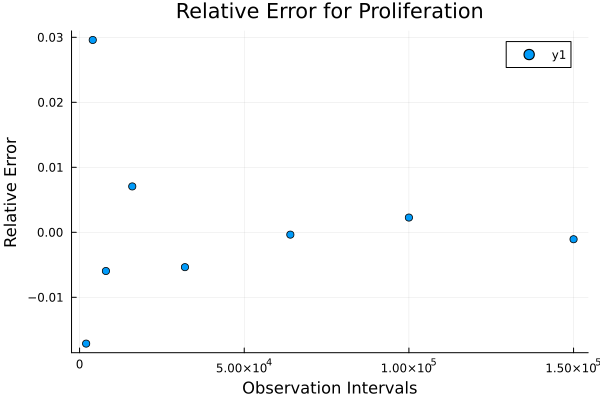

In [38]:
#getting the relative error points to check if the score converges

#proliferation
s1 = mean(network_scores[500:1000,1])
s2 = mean(network_scores[1000:2000,1])
s3 = mean(network_scores[2000:4000,1])
s4 = mean(network_scores[4000:8000,1])
s5 = mean(network_scores[8000:16000,1])
s6 = mean(network_scores[16000:32000,1])
s7 = mean(network_scores[32000:64000,1])
s8 = mean(network_scores[64000:100000,1])
s9 = mean(network_scores[100000:150000,1])

point_1 = ((s2-s1)/s1)
point_2 = ((s3-s2)/s2)
point_3 = ((s4-s3)/s3)
point_4 = ((s5-s4)/s4)
point_5 = ((s6-s5)/s5)
point_6 = ((s7-s6)/s6)
point_7 = ((s8-s7)/s7)
point_8 = ((s9-s8)/s8)

#saving into vectors
a = [point_1, point_2, point_3, point_4,point_5,point_6,point_7, point_8]
b = [2000, 4000, 8000, 16000, 32000, 64000,100000,150000]

#create a new dataframe for the relative_error
prolif_relative_error = DataFrame(observation_intervals=b, relative_error=a)

scatter(prolif_relative_error.observation_intervals, prolif_relative_error.relative_error, xlabel = "Observation Intervals", ylabel = "Relative Error", title = "Relative Error for Proliferation")

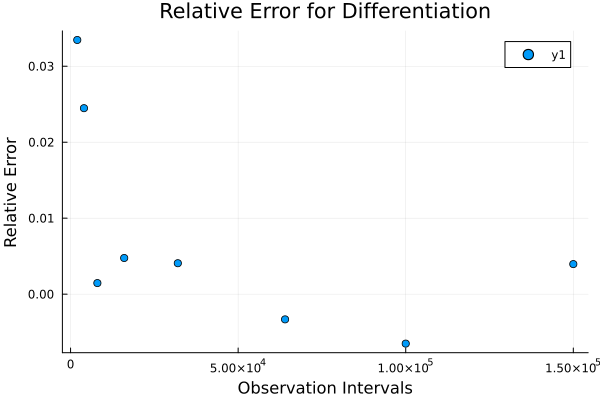

In [39]:
#getting the relative error points to check if the score converges

#differentiation
s1 = mean(network_scores[500:1000,2])
s2 = mean(network_scores[1000:2000,2])
s3 = mean(network_scores[2000:4000,2])
s4 = mean(network_scores[4000:8000,2])
s5 = mean(network_scores[8000:16000,2])
s6 = mean(network_scores[16000:32000,2])
s7 = mean(network_scores[32000:64000,2])
s8 = mean(network_scores[64000:100000,2])
s9 = mean(network_scores[100000:150000,2])

point_1 = ((s2-s1)/s1)
point_2 = ((s3-s2)/s2)
point_3 = ((s4-s3)/s3)
point_4 = ((s5-s4)/s4)
point_5 = ((s6-s5)/s5)
point_6 = ((s7-s6)/s6)
point_7 = ((s8-s7)/s7)
point_8 = ((s9-s8)/s8)

#saving into vectors
a = [point_1, point_2, point_3, point_4,point_5,point_6,point_7, point_8]
b = [2000, 4000, 8000, 16000, 32000, 64000,100000,150000]

#create a new dataframe for the relative_error
diff_relative_error = DataFrame(observation_intervals=b, relative_error=a)

scatter(diff_relative_error.observation_intervals, diff_relative_error.relative_error, xlabel = "Observation Intervals", ylabel = "Relative Error", title = "Relative Error for Differentiation")

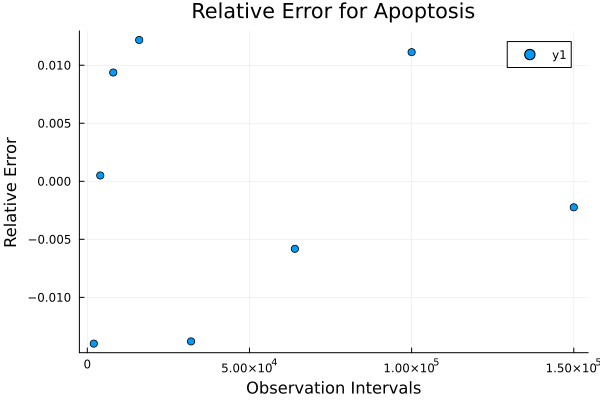

In [40]:
#getting the relative error points to check if the score converges

#differentiation
s1 = mean(network_scores[500:1000,3])
s2 = mean(network_scores[1000:2000,3])
s3 = mean(network_scores[2000:4000,3])
s4 = mean(network_scores[4000:8000,3])
s5 = mean(network_scores[8000:16000,3])
s6 = mean(network_scores[16000:32000,3])
s7 = mean(network_scores[32000:64000,3])
s8 = mean(network_scores[64000:100000,3])
s9 = mean(network_scores[100000:150000,3])

point_1 = ((s2-s1)/s1)
point_2 = ((s3-s2)/s2)
point_3 = ((s4-s3)/s3)
point_4 = ((s5-s4)/s4)
point_5 = ((s6-s5)/s5)
point_6 = ((s7-s6)/s6)
point_7 = ((s8-s7)/s7)
point_8 = ((s9-s8)/s8)

#saving into vectors
a = [point_1, point_2, point_3, point_4,point_5,point_6,point_7, point_8]
b = [2000, 4000, 8000, 16000, 32000, 64000,100000,150000]

#create a new dataframe for the relative_error
apop_relative_error = DataFrame(observation_intervals=b, relative_error=a)

scatter(apop_relative_error.observation_intervals, apop_relative_error.relative_error, xlabel = "Observation Intervals", ylabel = "Relative Error", title = "Relative Error for Apoptosis")

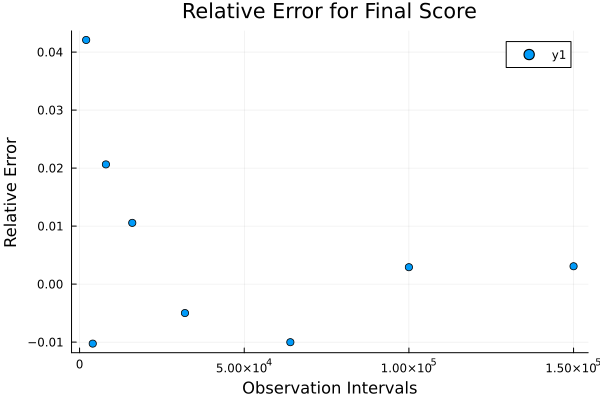

In [41]:
#getting the relative error points to check if the score converges

#differentiation
s1 = mean(network_scores[500:1000,4])
s2 = mean(network_scores[1000:2000,4])
s3 = mean(network_scores[2000:4000,4])
s4 = mean(network_scores[4000:8000,4])
s5 = mean(network_scores[8000:16000,4])
s6 = mean(network_scores[16000:32000,4])
s7 = mean(network_scores[32000:64000,4])
s8 = mean(network_scores[64000:100000,4])
s9 = mean(network_scores[100000:150000,4])

point_1 = ((s2-s1)/s1)
point_2 = ((s3-s2)/s2)
point_3 = ((s4-s3)/s3)
point_4 = ((s5-s4)/s4)
point_5 = ((s6-s5)/s5)
point_6 = ((s7-s6)/s6)
point_7 = ((s8-s7)/s7)
point_8 = ((s9-s8)/s8)

#saving into vectors
a = [point_1, point_2, point_3, point_4,point_5,point_6,point_7,point_8]
b = [2000, 4000, 8000, 16000, 32000, 64000,100000,150000]

#create a new dataframe for the relative_error
final_relative_error = DataFrame(observation_intervals=b, relative_error=a)

scatter(final_relative_error.observation_intervals, final_relative_error.relative_error, xlabel = "Observation Intervals", ylabel = "Relative Error", title = "Relative Error for Final Score")